In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 2: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten 28x28 images to 784 features
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32') / 255

# Convert labels (0–9) to one-hot vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build ANN Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8235 - loss: 0.6368 - val_accuracy: 0.9580 - val_loss: 0.1498
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9535 - loss: 0.1572 - val_accuracy: 0.9710 - val_loss: 0.1053
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9688 - loss: 0.1053 - val_accuracy: 0.9715 - val_loss: 0.0914
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9777 - loss: 0.0758 - val_accuracy: 0.9740 - val_loss: 0.0831
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9778 - val_loss: 0.0749
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0480 - val_accuracy: 0.9783 - val_loss: 0.0756
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9899 - loss: 0.0358 - val_accuracy: 0.9730 - val_loss: 0.0880
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0

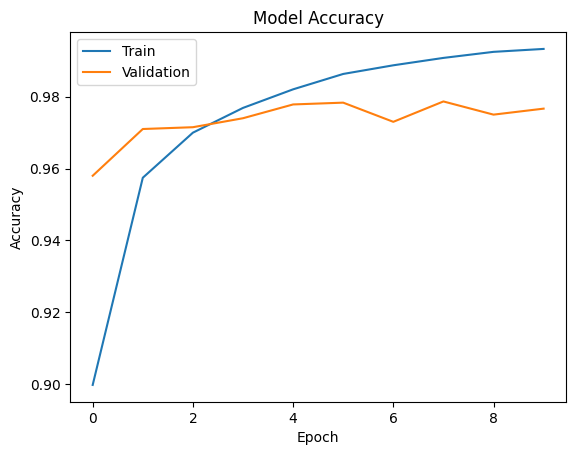

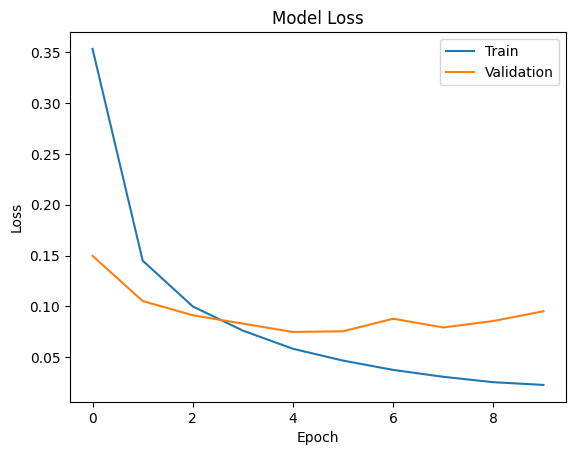

In [2]:
# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


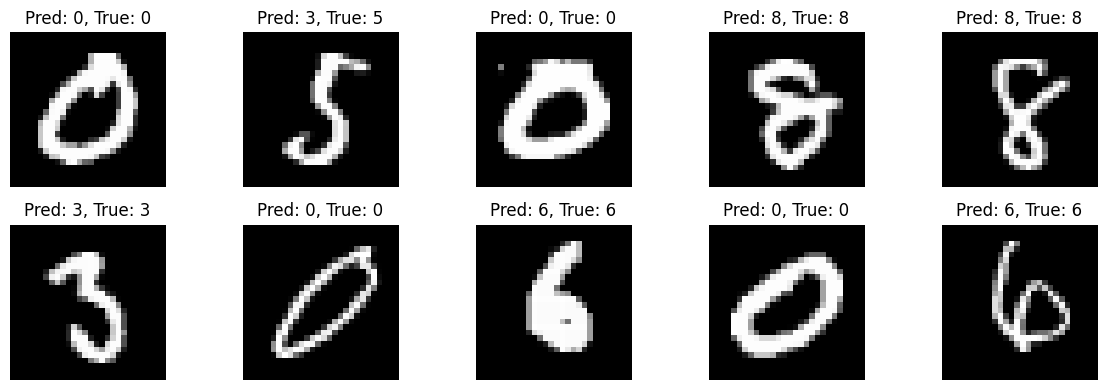

In [3]:
# Predict on test data
pred = model.predict(x_test)
pred_labels = np.argmax(pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Display 10 random predictions
index = np.random.randint(0, len(x_test), 10)
plt.figure(figsize=(12,4))
for i, idx in enumerate(index):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_labels[idx]}, True: {true_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
